In [1]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

# This attempts to re-compile the library in case it has been changed, mostly for debug, but won't do anything
# if nothing is changed
import subprocess
out = subprocess.run(["python", "setup.py", "build_ext", "--inplace"], stdout=subprocess.PIPE)
import gropt

from helper_utils import *

%matplotlib inline

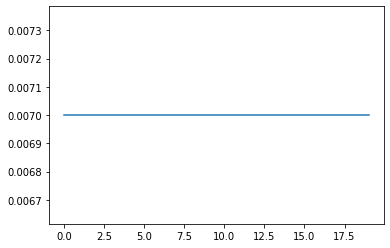

In [2]:
dt = 10e-6

g_ss = .0070
N_ss = int(np.round(1.375/(g_ss*dt)*1e-6))
G_ss = np.ones(N_ss) * g_ss

plt.figure()
plt.plot(G_ss)

Fixed region of waveform = 0.210000 ms
Testing TE = 0.61 0.80 0.90 0.85 0.88 0.89 0.88 0.89 0.89 Final TE = 0.890 ms


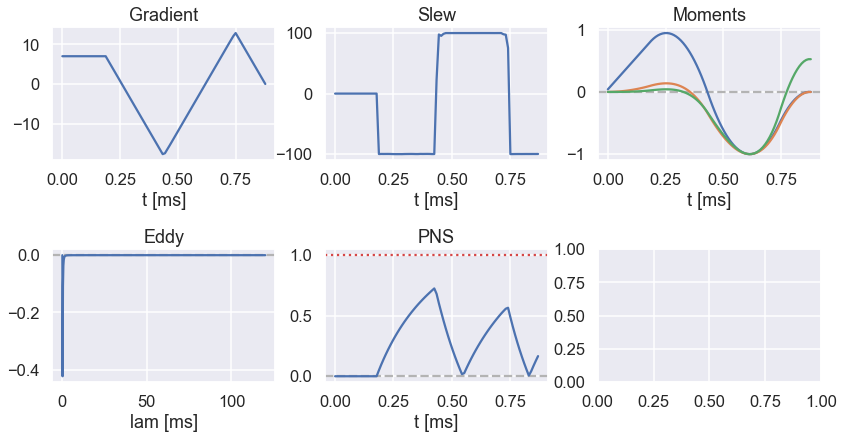

In [3]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.05
params['smax']  = 100.0

params['moment_params']  = [[0, 0, 0, -1, -1, 0.0, 1.0e-3]]
params['moment_params'].append([0, 1, 0, -1, -1, 0.0, 1.0e-3])
params['dt']  = dt

TE = 1.0e-3
N = int(np.round(TE/dt))
gfix = np.ones(N) * -999999
gfix[0] = 0.0
gfix[-1] = 0.0
gfix[:N_ss] = G_ss

params['gfix']  = gfix

max_TE = 1.0
G, T = get_min_TE_gfix(params, max_TE, True)
plot_waveform(G, params)